### Import Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset

In [74]:
df = pd.read_csv("appliance_energy.csv")

#display the first few rows to understand the structure
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [75]:
#Cheack for missing values
print(df.isnull().sum())
#df=df.dropna()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [76]:
#features (independent variables) and target (dependent variables)
#independent variable (Temperature)
X = df[['Temperature (°C)']]
#Dependent variable (Energy Consumption)
y = df['Energy Consumption (kWh)']

In [77]:
#Split the training data into testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Create a Linear Regression model

In [79]:
model = LinearRegression()
#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [80]:
print('Slope: ', model.coef_)
print('y-intercept: ', model.intercept_)

Slope:  [0.08996618]
y-intercept:  0.22196391661907766


In [81]:
# y = mx + c
print(model.coef_*22.49 + model.intercept_)

[2.24530337]


In [82]:
#Make Prediction on the test data
y_pred = model.predict(X_test)

In [83]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [84]:
#Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
#Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 0.16342487842925058
R-squared: 0.6119478445218713


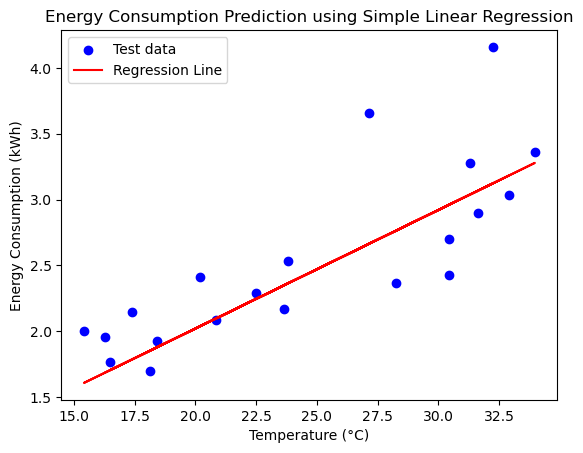

In [85]:
#Plot the test data and regression line
plt.scatter(X_test, y_test, color='blue',label='Test data')  #Actual data
plt.plot(X_test, y_pred, color='red', label='Regression Line') #Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [86]:
import joblib
#Save the model to a file
joblib.dump(model,'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [87]:
import pickle

# Load the pickle file in binary mode
with open('C:\\Users\\siddd\\AI ML\\GREEN AI\\appliance_energy_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Save the model back to a new pickle file in binary mode
with open('C:\\Users\\siddd\\AI ML\\GREEN AI\\appliance_energy_model_utf8.pkl', 'wb') as file:
    pickle.dump(model, file)
